# Keyword Analysis of CHI Best Papers 2016-2020

In this analysis, we will collect and chart the author keywords used for the Best Paper winners at the Conference on Human Factors in Computing Systems (CHI) from 2016 to 2020.
The aim of this research is to identify commonalities between those top 1% of articles honoured by the Best Paper Committee and to explore signficant trends among those.

## Reading in the data

First, we import the necessary packages and read in the keyword data from the respective file.

In [153]:
# Imports
import pandas as pd

# Utility Functions
def string_to_list(list_as_string: str, delimiter=", ") -> list[str]:
    """A simple function that splits a list input as a string by the specified delimiter and returns the list."""
    return list_as_string.split(delimiter)

def print_dataframe_summary(dataframe: pd.DataFrame, include_description=False, head_nrows=10) -> None:
    """Uses pandas' info, head, and---depending on the description flag---describe methods to output information about a DataFrame."""
    print("Information about dataframe:")
    print(dataframe.info())
    print()
    print("Top 10 rows of dataframe:")
    print(dataframe.head(n=head_nrows))
    if include_description:
        print()
        print("Description of dataframe:")
        print(dataframe.describe())

In [154]:
best_papers = pd.read_csv("best_papers.csv", delimiter=";", converters={"keywords": string_to_list})
best_papers.rename(columns={"keywords": "original_keywords"}, inplace=True)

print_dataframe_summary(best_papers)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               85 non-null     int64 
 1   original_keywords  85 non-null     object
 2   doi                85 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None

Top 10 rows of dataframe:
   year                                  original_keywords  \
0  2020  [deception, influence, behavior change, cybers...   
1  2020  [Visualization, Design Studies, Service-Learni...   
2  2020  [VR, trigeminal, smell, thermal, illusion, hap...   
3  2020  [Visualization, Responsive Design, News, Mobil...   
4  2020  [Hardware device realization, low volume elect...   
5  2020  [Game-based learning, game design, computation...   
6  2020  [AR/VR authoring, augmented reality, virtual r...   
7  2020  [Mobile Video Calls, Distributed Families, Fac.

## Normalisation

Next, since we are interested in individual keywords and their co-occurences, we normalise the DataFrame to have one keyword per row.

In [155]:
# Explode (have one row for every keyword)
keywords = best_papers.explode("original_keywords").rename(columns={"original_keywords": "original_keyword"})

print_dataframe_summary(keywords)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 84
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              434 non-null    int64 
 1   original_keyword  434 non-null    object
 2   doi               434 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.6+ KB
None

Top 10 rows of dataframe:
   year    original_keyword                                      doi
0  2020           deception  https://doi.org/10.1145/3313831.3376832
0  2020           influence  https://doi.org/10.1145/3313831.3376832
0  2020     behavior change  https://doi.org/10.1145/3313831.3376832
0  2020       cybersecurity  https://doi.org/10.1145/3313831.3376832
0  2020         interaction  https://doi.org/10.1145/3313831.3376832
1  2020       Visualization  https://doi.org/10.1145/3313831.3376829
1  2020      Design Studies  https://doi.org/10.1145/3313831.3376829
1  

### Pre-processing

There are several possible pitfalls with the raw author keywords that have to be addressed.
Therefore, we will pre-process the keywords using the following transformations:

- Removing any possible leading and trailing whitespace
- Transforming all keywords to their lowercase form
- Replacing abbreviations which might be used in either short- or long-form (e.g. AI) with their long-form (e.g. artificial intelligence)
- Replacing all dialect spellings (e.g. British English) with their American English forms (CHI allows any consistent dialect but American English is most common)

In [156]:
# Remove possible leading and trailing whitespace
keywords["original_keyword"].replace(to_replace="(^\s* | \s*$)", inplace=True)
keywords = keywords.reset_index(drop=True)

# Copy original keyword into keyword column
keywords["keyword"] = keywords["original_keyword"]

# Transform to lowercase
keywords["keyword"] = keywords["keyword"].str.lower()

# Replace abbreviations
abbreviations = {
    "nhst": "null hypothesis significance testing",
    "em": "electromagnetic",
    "ictd": "information communication technologies for development",
    "hci4d": "human-computer interaction for development",
    "cci": "child-computer interaction",
    "gis": "geographic information systems",
    "esm": "experience sampling method",
    "ema": "ecological momentary assessment",
    "vru": "vulnerable road user",
    "ehmi": "external human-machine-interface",
    "ai": "artificial intelligence",
    "ml": "machine learning",
    "aac": "alternative and augmentative communication",
    "nicu": "neonatal intensive care unit",
    "hci": "human-computer interaction",
    "ar": "augmented reality",
    "vr": "virtual reality"
}
regex_leading = r"(^|(?<=\/)|(?<=\s))"
regex_trailing = r"(.$|(?=\/)|(?=,)|(?=\s))"
regex_abbreviations = {f"{regex_leading}{key}{regex_trailing}": value.lower() for key, value in abbreviations.items()}
keywords["keyword"].replace(to_replace=regex_abbreviations, inplace=True, regex=True)

# Replace dialect spellings
dialect_spellings = {
    "customisation": "customization",
}
keywords["keyword"].replace(to_replace=dialect_spellings, inplace=True)

print_dataframe_summary(keywords)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              434 non-null    int64 
 1   original_keyword  434 non-null    object
 2   doi               434 non-null    object
 3   keyword           434 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.7+ KB
None

Top 10 rows of dataframe:
   year    original_keyword                                      doi  \
0  2020           deception  https://doi.org/10.1145/3313831.3376832   
1  2020           influence  https://doi.org/10.1145/3313831.3376832   
2  2020     behavior change  https://doi.org/10.1145/3313831.3376832   
3  2020       cybersecurity  https://doi.org/10.1145/3313831.3376832   
4  2020         interaction  https://doi.org/10.1145/3313831.3376832   
5  2020       Visualization  https://doi.org/10.1145/3313831.3376829   
6  2

In [157]:
# Returning list of keywords back together into best papers DataFrame
best_papers = best_papers.set_index("doi").join(keywords[["doi", "keyword"]].groupby("doi").agg({"keyword": lambda keyword: keyword.tolist()})).rename(columns={"keyword": "keywords"})
best_papers = best_papers.reset_index()

print_dataframe_summary(best_papers)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doi                85 non-null     object
 1   year               85 non-null     int64 
 2   original_keywords  85 non-null     object
 3   keywords           85 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.8+ KB
None

Top 10 rows of dataframe:
                                       doi  year  \
0  https://doi.org/10.1145/3173574.3173582  2018   
1  https://doi.org/10.1145/3173574.3173588  2018   
2  https://doi.org/10.1145/3173574.3173614  2018   
3  https://doi.org/10.1145/3173574.3173655  2018   
4  https://doi.org/10.1145/3173574.3173688  2018   
5  https://doi.org/10.1145/3173574.3173697  2018   
6  https://doi.org/10.1145/3173574.3173715  2018   
7  https://doi.org/10.1145/3173574.3173784  2018   
8  https://doi.org/10.1145/3173574.31

## Analysis

First, we will look at some simple descriptive measures that characterise the dataset.
Afterwards, we will start analyzing the keywords to explore relationships between papers.

### Descriptive analysis

Let us look at some descriptive measure first.

In [158]:
best_papers['number_of_keywords'] = best_papers['keywords'].apply(lambda keywords_list: len(keywords_list))

print("Number of author keywords per Best Paper:")
print(best_papers['number_of_keywords'].describe())

Number of author keywords per Best Paper:
count    85.000000
mean      5.176471
std       1.833397
min       3.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      13.000000
Name: number_of_keywords, dtype: float64


### Further analysis

Next, we will look at pairwise cosine similarities to identify similar Best Papers based on their author keywords.

In [159]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

best_papers["joined_keywords"] = best_papers["keywords"].apply(lambda keywords: "; ".join(keywords))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(best_papers["joined_keywords"])
#print(vectorizer.get_feature_names())
#print(X.toarray())

cosine_similarities = pd.DataFrame(cosine_similarity(X.toarray()))
best_papers = pd.concat([best_papers, cosine_similarities], axis=1)

print_dataframe_summary(best_papers)

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   doi                 85 non-null     object 
 1   year                85 non-null     int64  
 2   original_keywords   85 non-null     object 
 3   keywords            85 non-null     object 
 4   number_of_keywords  85 non-null     int64  
 5   joined_keywords     85 non-null     object 
 6   0                   85 non-null     float64
 7   1                   85 non-null     float64
 8   2                   85 non-null     float64
 9   3                   85 non-null     float64
 10  4                   85 non-null     float64
 11  5                   85 non-null     float64
 12  6                   85 non-null     float64
 13  7                   85 non-null     float64
 14  8                   85 non-null     float64
 15  9                   85 non-nul

### Visualisation

In [171]:
from sklearn.manifold import TSNE
from gensim.models import word2vec

SIZE = 5
WINDOW = 3
WORKERS = 4

def build_corpus(keywords_list:[[str]], separator=" ") -> [[str]]:
    """Splits multi-word keyboards by separator."""
    corpus = []
    for keywords in keywords_list:
        updated_keywords = []
        for keyword in keywords:
            split_keyword = keyword.split(separator)
            for word in split_keyword:
                updated_keywords.append(word)
        corpus.append(updated_keywords)
    return corpus

corpus = list(best_papers["keywords"])
#corpus = build_corpus(list(best_papers["keywords"]))
#print(corpus)

model = word2vec.Word2Vec(corpus, size=SIZE, window=WINDOW, min_count=1, workers=WORKERS)
#print(model.wv["privacy"])

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


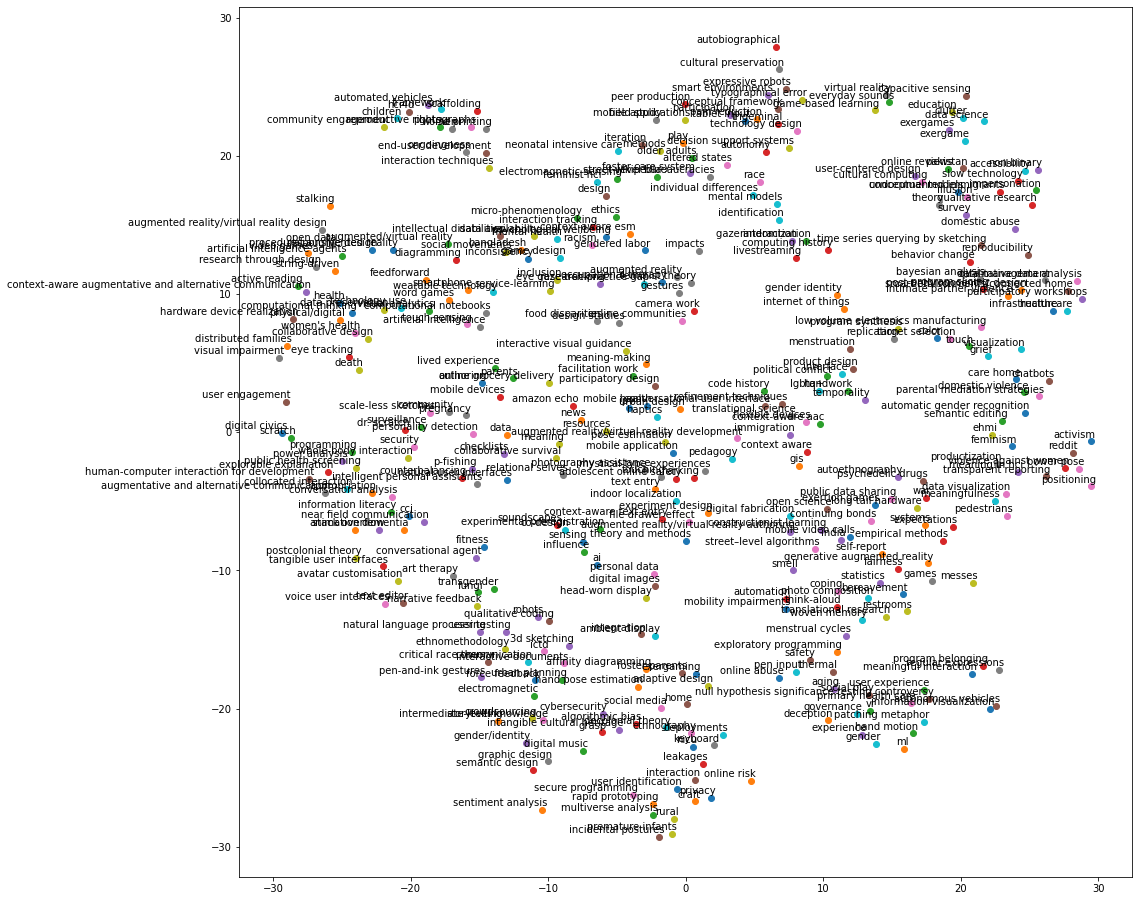

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


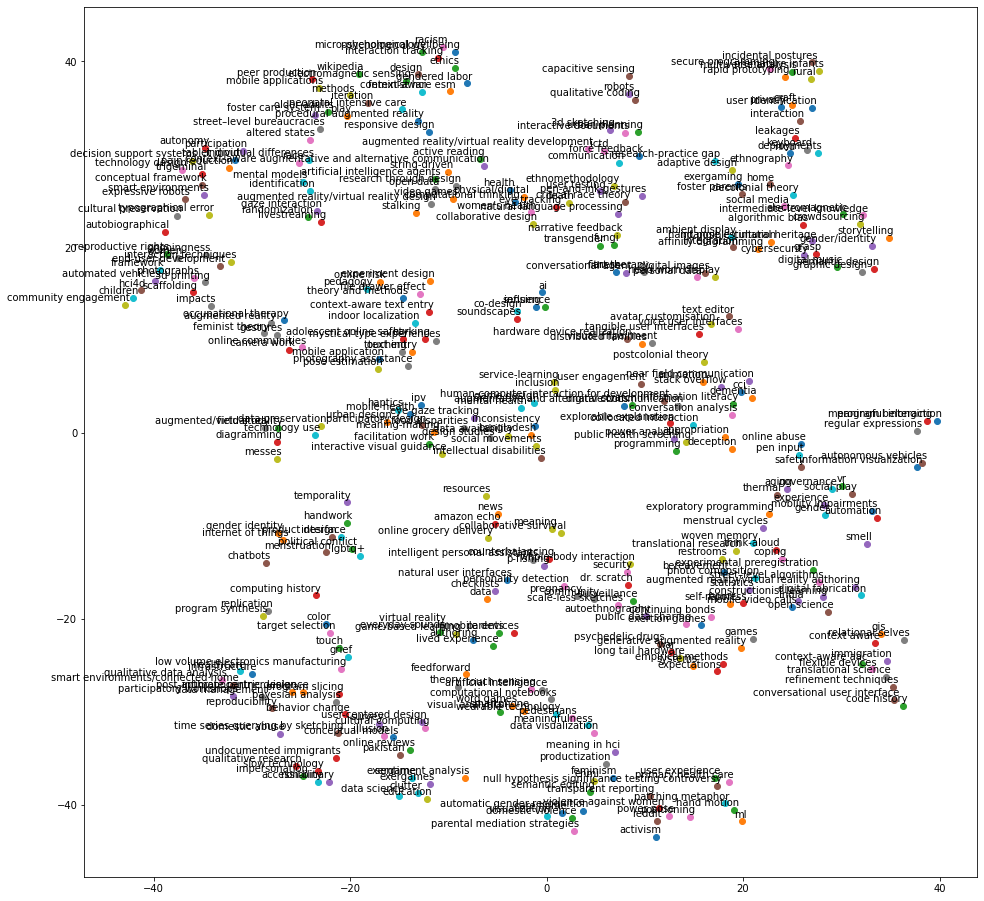

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


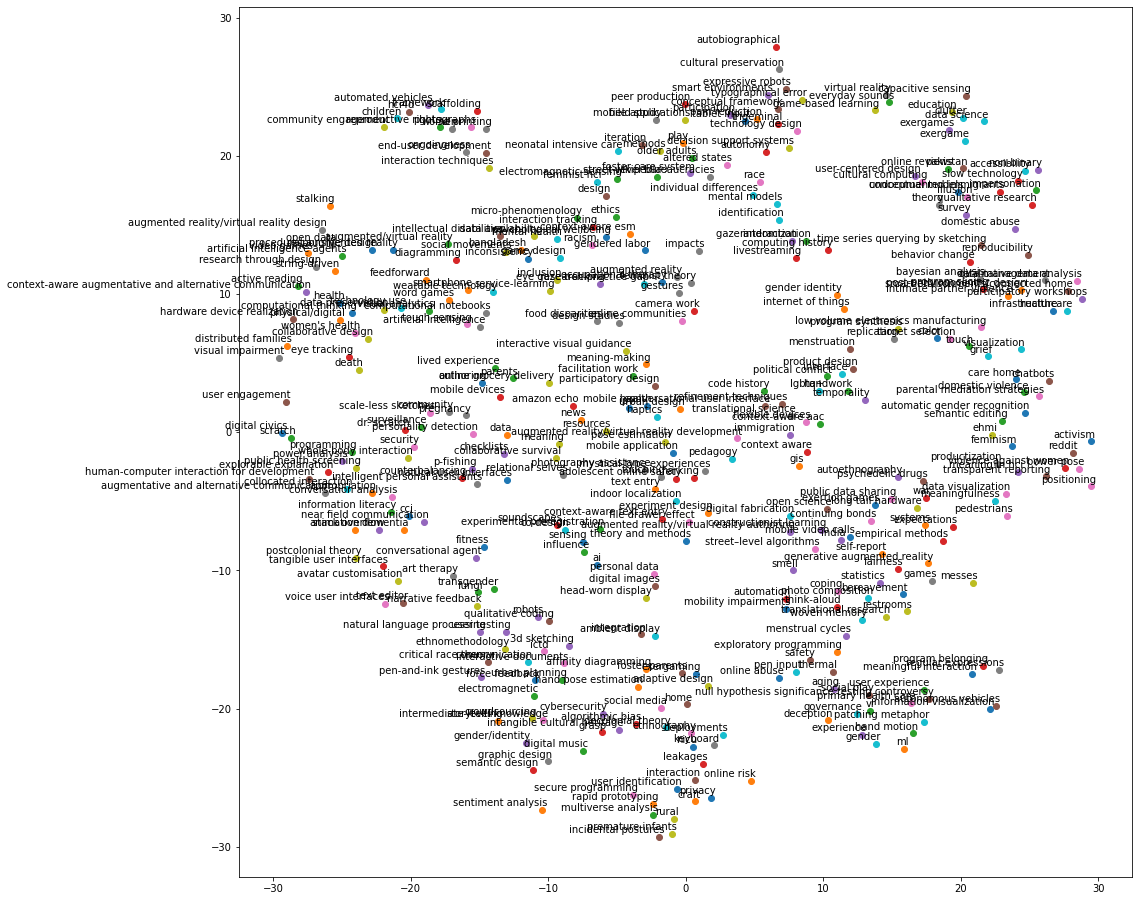

In [179]:
import matplotlib.pyplot as plt

def tsne_plot(model, perplexity=20):
    """Creates a TSNE model and plots it."""
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)
tsne_plot(model, perplexity=10)
tsne_plot(model, perplexity=20)

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


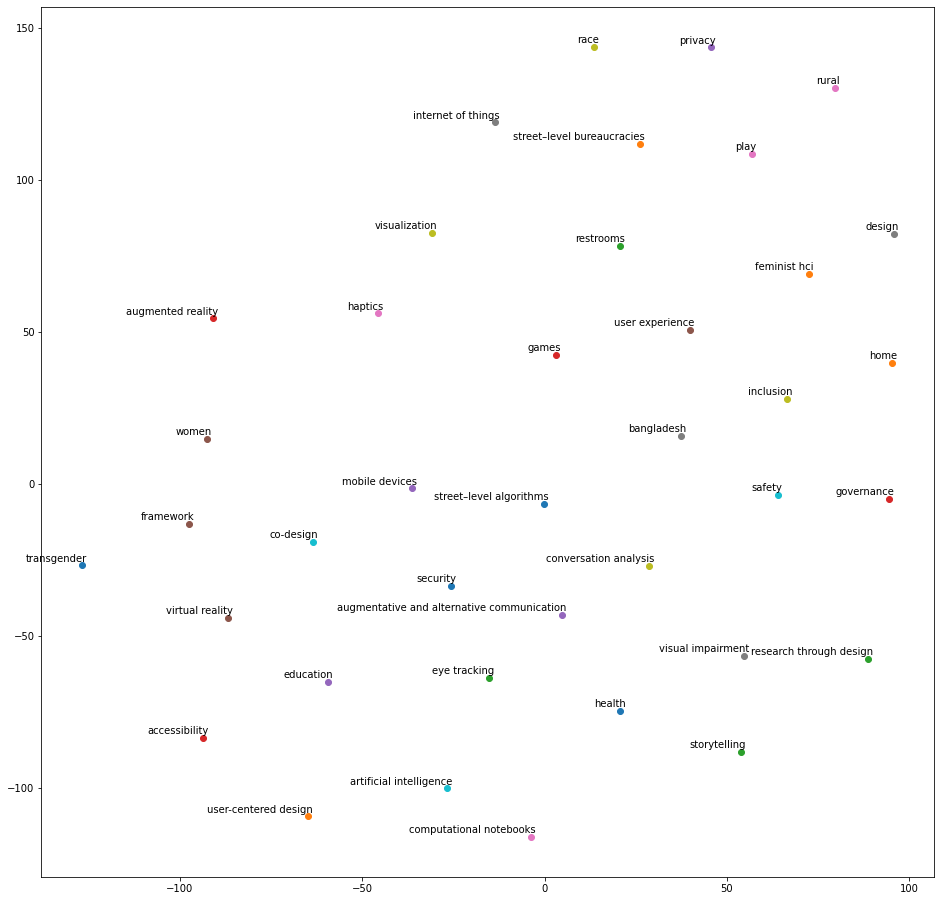

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


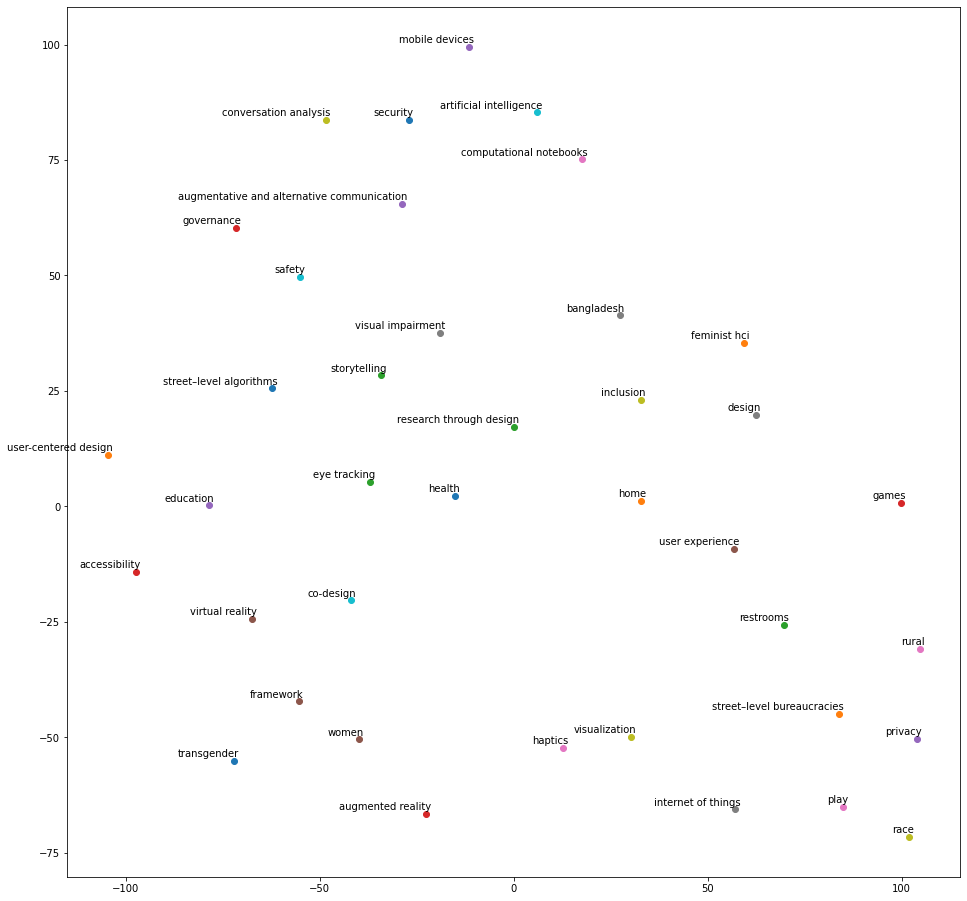

<ipython-input-179-078edb51f462>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


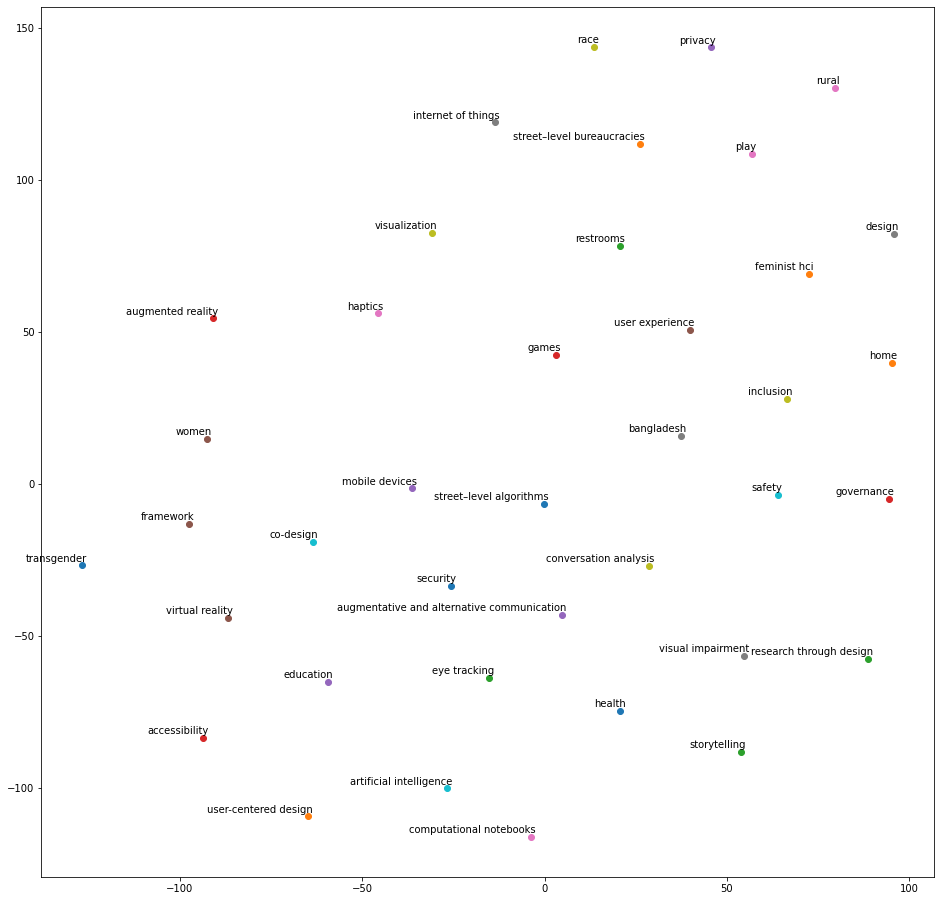

In [180]:
# A more selective model
selective_model = word2vec.Word2Vec(corpus, size=SIZE, window=WINDOW, min_count=2, workers=WORKERS)
tsne_plot(selective_model)
tsne_plot(selective_model, perplexity=10)
tsne_plot(selective_model, perplexity=20)

## To Do

- splitting combined expressions (e.g. AR/VR)?
- check correlation with CCS concepts?